# K-Nearest Neighbours (KNN): Exploratory Data Analysis 

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Predict whether a passanger on the titanic survived or not.

### b) Defining the Metric for Success

A KNN classifier model that is at least 80% accurate.

### c) Recording the Experimental Design

1. Loading, reading and checking the data. 
2. Data cleaning
3. Exploratory Analysis
4. Modelling and implementing our solution
5. Challenging the solution.



### d) Data Relevance

The data was collected from research on the Titanic's survivour. It is therefore relevant to our study.

## 2. Reading the Data

In [272]:
# import libraries
#
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor




In [273]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = http://bit.ly/WineQualityDatasetSource
# ---
#
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C




## 3. Checking the Data

In [274]:
# Determining the no. of records in our dataset
#
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [275]:
# Previewing the top of our dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [276]:
# Previewing the bottom of our dataset
# 
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [277]:
# Checking whether each column has an appropriate datatype
#
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. External Data Source Validation

### a.Validation

The data source is valid.

## 5. Tidying the Dataset

In [278]:
# Checking for Outliers
#
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

print((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR)))


PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             17.8750
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64
       Age  Cabin  Embarked   Fare   Name  Parch  PassengerId  Pclass    Sex  \
0    False  False     False  False  False  False        False   False  False   
1    False  False     False   True  False  False        False   False  False   
2    False  False     False  False  False  False        False   False  False   
3    False  False     False  False  False  False        False   False  False   
4    False  False     False  False  False  False        False   False  False   
..     ...    ...       ...    ...    ...    ...          ...     ...    ...   
886  False  False     False  False  False  False        False   False  False   
887  False  False     False  False  False  False        False   False  False   
888  False  False     False  False  False   True        False   False  False   
889  False  False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [279]:
# Checking for Anomalies
#
print(train.duplicated().sum())



0


In [280]:
train.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [281]:
# Identifying the Missing Data
#
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [282]:
# Dealing with the Missing Data
# 1)Drop cabin column 
#
train.drop(columns=['Cabin'], inplace=True)


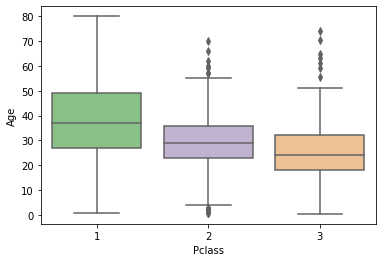

In [283]:
# 2) Fill in age column since it is an important variable
# using function and the pclass column to give us an estimate
# Visualisation by box plot to give a rough estimate
#
sns.boxplot(x='Pclass', y='Age', data=train, palette='Accent');

In [284]:
# the above estimates show the mean age for the three classes
# as 38, 29 and 24 respectively
#
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age', 'Pclass']].apply(age_approx, axis=1)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [285]:
# 3)Drop rows with null embarked
#
train.dropna(inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [286]:
# drop redundant columns
#
train.drop(columns=['PassengerId','Name','Ticket'], inplace=True)


In [287]:
gender = pd.get_dummies(train['Sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [288]:
embarked_ = pd.get_dummies(train['Embarked'],drop_first=True)
embarked_.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [289]:
# drop categorical column and merge original dataset with dummies
#
train.drop(['Sex', 'Embarked'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [290]:
survived = pd.concat([train,gender,embarked_],axis=1)
survived.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## 6. Exploratory Analysis

In [291]:
# univariate summaries
#
survived.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.053060,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,0.486260,0.834700,13.231443,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [292]:
# other measures of central tendancy and spread
#
print(survived.median())
print('*' * 50)
print(survived.mode())
print('*' * 50)
print(survived.skew())
print('*' * 50)
print(survived.kurt())

Survived     0.0000
Pclass       3.0000
Age         26.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
male         1.0000
Q            0.0000
S            1.0000
dtype: float64
**************************************************
   Survived  Pclass   Age  SibSp  Parch  Fare  male  Q  S
0         0       3  24.0      0      0  8.05     1  0  1
**************************************************
Survived    0.484568
Pclass     -0.636998
Age         0.539530
SibSp       3.691058
Parch       2.745160
Fare        4.801440
male       -0.625625
Q           2.944406
S          -1.006192
dtype: float64
**************************************************
Survived    -1.769179
Pclass      -1.269437
Age          0.767534
SibSp       17.838972
Parch        9.750592
Fare        33.508477
male        -1.612225
Q            6.684560
S           -0.989810
dtype: float64


In [293]:
# Ploting the bivariate summaries and recording our observations
#
survived.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.335549,-0.051524,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.408898,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,-0.051524,-0.408898,1.000000,-0.243160,-0.170916,0.122202,0.083865,-0.081529,0.013056
SibSp,-0.034040,0.081656,-0.243160,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,0.083151,0.016824,-0.170916,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.122202,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,-0.541585,0.127741,0.083865,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,0.004536,0.220558,-0.081529,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,-0.151777,0.076466,0.013056,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


In [294]:
# pclass and fare are not independent
# drop fare
#
survived.drop(['Fare'],axis=1,inplace=True)
survived.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


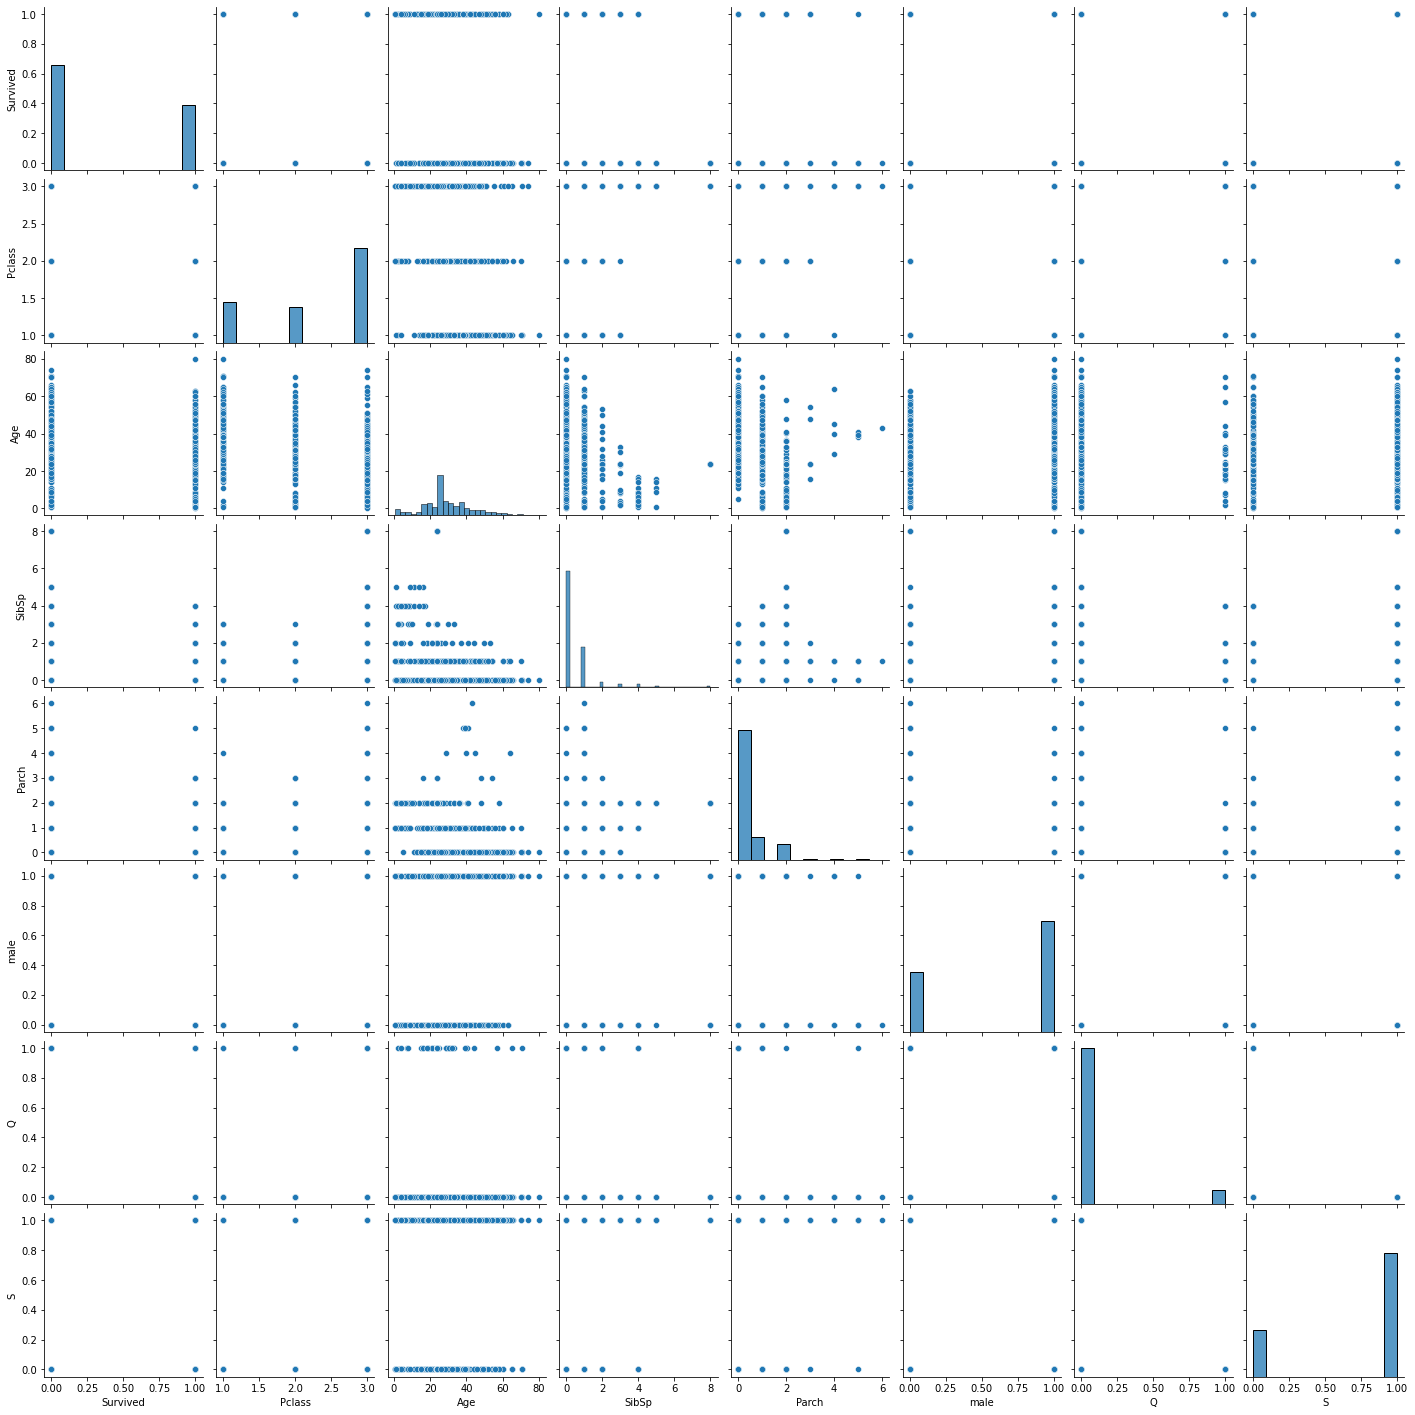

In [295]:
# scatter plot
#
sns.pairplot(survived)
plt.show()

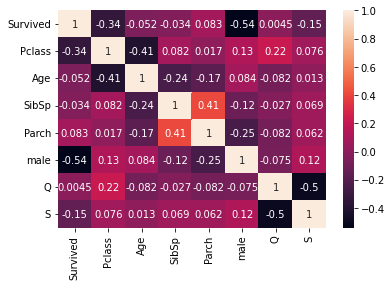

In [296]:
# corelation heatmap
#
sns.heatmap(survived.corr(),annot=True)
plt.show()

In [356]:
# Data Reduction
#
X = survived.iloc[:, 1:8].values
y = survived.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

## 7. Implementing the Solution

In [357]:
# Implementing the Solution with 80% of train data
# 
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [358]:
# cross validating the model
#
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

print(all_accuracies.mean())

0.8270363439377524


In [359]:
# hyperparameter tuning with randomised search
#
from scipy.stats import randint as sp_randint
param_dist = {"n_neighbors": sp_randint(1, 11),
              "algorithm": ["auto", "ball_tree", "kd_tree"],
              "weights": ["uniform", "distance"]}

In [360]:
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5) 
random_sr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f313eea10>,
                                        'weights': ['uniform', 'distance']})

In [361]:
# get the best parameters
#
best_parameters = random_sr.best_params_
print(best_parameters)

best_result = random_sr.best_score_
print(best_result)

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
0.8424800551561115


In [364]:
# fit model with the best parameters
#
classifier = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='auto', 
                                  metric='minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [365]:
# Model accuracy, predictions and confusion matrix
#
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7134831460674157
[[85 20]
 [31 42]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       105
           1       0.68      0.58      0.62        73

    accuracy                           0.71       178
   macro avg       0.71      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178



Training 70% of the data:

In [366]:
# scalling and data reduction
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [367]:
# Fit model
#
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [368]:
# cross validating the model
#
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

print(all_accuracies.mean())

0.7909806451612903


In [369]:
# hyperparameter tuning with randomised search
#
from scipy.stats import randint as sp_randint
param_dist = {"n_neighbors": sp_randint(1, 11),
              "algorithm": ["auto", "ball_tree", "kd_tree"],
              "weights": ["uniform", "distance"]}

In [370]:
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5) 
random_sr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f2d1bab90>,
                                        'weights': ['uniform', 'distance']})

In [371]:
# get the best parameters
#
best_parameters = random_sr.best_params_
print(best_parameters)

best_result = random_sr.best_score_
print(best_result)

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'}
0.8248


In [372]:
# fit model with the best parameters
#
classifier = KNeighborsClassifier(n_neighbors=8, weights='uniform', algorithm='kd_tree', 
                                  metric='minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=8)

In [373]:
# Model accuracy, predictions and confusion matrix
#
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7677902621722846
[[142  15]
 [ 47  63]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       157
           1       0.81      0.57      0.67       110

    accuracy                           0.77       267
   macro avg       0.78      0.74      0.75       267
weighted avg       0.77      0.77      0.76       267



Training 60% of the data:

In [374]:
# scaling and data reduction
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [375]:
# Fit model
#
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [376]:
# cross validating the model
#
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

print(all_accuracies.mean())

0.8104038088520543


In [377]:
# hyperparameter tuning with randomised search
#
from scipy.stats import randint as sp_randint
param_dist = {"n_neighbors": sp_randint(1, 11),
              "algorithm": ["auto", "ball_tree", "kd_tree"],
              "weights": ["uniform", "distance"]}

In [378]:
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5) 
random_sr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f3106c2d0>,
                                        'weights': ['uniform', 'distance']})

In [379]:
# get the best parameters
#
best_parameters = random_sr.best_params_
print(best_parameters)

best_result = random_sr.best_score_
print(best_result)

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
0.8104038088520543


In [380]:
# fit model with the best parameters
#
classifier = KNeighborsClassifier(n_neighbors=8, weights='uniform', metric='minkowski',
                                  algorithm='kd_tree')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=8)

In [381]:
# Model accuracy, predictions and confusion matrix
#
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7837078651685393
[[196  20]
 [ 57  83]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       216
           1       0.81      0.59      0.68       140

    accuracy                           0.78       356
   macro avg       0.79      0.75      0.76       356
weighted avg       0.79      0.78      0.78       356



Fixing some parameters(leaf size and p) for hyperparameter tuning on randomizeCV seemed to reduce the accuracy slightly. Weight, nearest neighbors and algorithm, seemed to be the best parameters suited for tuning. The rest were better left on default. Finally, the analysis on different training sets showed that training 60% of the data yielded the highest accuracy.

## 8. Challenging the solution

The different accuracies achieved by the varied train-test set were not satisfactory. A more detailed dataset and further optimization methods should be applied. If the metric of success is not achived, the same analysis needs to be repeated with other classifiers for comparison.

## 9. Follow up questions

### a). Did we have the right data?

Yes, though it had limited information

### b). Do we need other data to answer our question?

Yes, especially since this dataset had alot of missing crucial information that had to be filled by estimates. More detailed data will be required.

### c). Did we have the right question?

Yes.